In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as un
from class_bomba import bomba, Q2v, incert_A, error

rho, g = 997, 9.8067

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados_exp3.xlsx', sheet_name='instr')
#Info medidas -> var pressão descarga
df_desc = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados_exp3.xlsx', sheet_name='v1')
#Info medidas -> var pressão sucção
df_suc = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 2 - Bombas Centrífugas valv. Sucção/dados_exp3.xlsx', sheet_name='v2')

#Incerteza do tipo A
ze = incert_A(df_inst.ze.values) / 100  #m
zs = incert_A(df_inst.zs.values) / 100
De = incert_A(df_inst.De.values) / 1000
Ds = incert_A(df_inst.Ds.values) / 1000
Drot = incert_A(df_inst.D.values) / 100

#Incerteza do tipo B - a/raiz(3) - Val. descarga
d_pe = un.uarray(df_desc.pe.values, (df_desc.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
d_ps = un.uarray(df_desc.ps.values, (df_desc.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
d_Q = un.uarray(df_desc.Q.values, (df_desc.Q.values*0.02)/np.sqrt(3)) #m^3/h
d_w = un.uarray(df_desc.w.values, (df_desc.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - a/raiz(3) - Val. sucção
s_pe = un.uarray(df_suc.pe.values, (df_suc.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
s_ps = un.uarray(df_suc.ps.values, (df_suc.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
s_Q = un.uarray(df_suc.Q.values, (df_suc.Q.values*0.02)/np.sqrt(3)) #m^3/h
s_w = un.uarray(df_suc.w.values, (df_suc.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

In [2]:
b1  = bomba(d_pe, d_ps, Q2v(d_Q, De), Q2v(d_Q, Ds), ze, zs)
b2  = bomba(s_pe, s_ps, Q2v(s_Q, De), Q2v(s_Q, Ds), ze, zs)

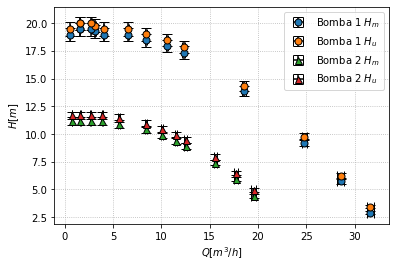

In [3]:
# Figura 1 
#%matplotlib
fig, ax = plt.subplots()
ax.set(ylabel=r'$H [m]$', xlabel=r'$Q [m^3/h]$')

#Bomba 1
error(d_Q, b1.hm, 'o', r'Bomba 1 $H_m$', ax)
error(d_Q, b1.hu, 'o', r'Bomba 1 $H_u$', ax)

#Bomba 2
error(s_Q, b2.hm, '^', r'Bomba 2 $H_m$', ax)
error(s_Q, b2.hu, '^', r'Bomba 2 $H_u$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('H_x_Q.pdf', bbox_inches='tight')

In [4]:
tab = pd.DataFrame({'s_Q':s_Q, 'Hm':b2.hm, 'Hu':b2.hu})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &            s\_Q &            Hm &            Hu \\
\midrule
0  &   19.54+/-0.23 &   4.41+/-0.15 &   4.94+/-0.15 \\
1  &   17.71+/-0.20 &   5.92+/-0.19 &   6.45+/-0.19 \\
2  &   15.60+/-0.18 &   7.40+/-0.23 &   7.93+/-0.23 \\
3  &   12.51+/-0.14 &   8.91+/-0.28 &   9.44+/-0.28 \\
4  &   11.52+/-0.13 &   9.41+/-0.29 &   9.94+/-0.29 \\
5  &   10.05+/-0.12 &   9.91+/-0.30 &  10.44+/-0.30 \\
6  &    8.43+/-0.10 &  10.41+/-0.32 &  10.94+/-0.32 \\
7  &    5.62+/-0.06 &  10.91+/-0.33 &  11.44+/-0.33 \\
8  &    3.86+/-0.04 &  11.16+/-0.34 &  11.69+/-0.34 \\
9  &  2.670+/-0.031 &  11.16+/-0.34 &  11.69+/-0.34 \\
10 &  1.610+/-0.019 &  11.16+/-0.34 &  11.69+/-0.34 \\
11 &  0.770+/-0.009 &  11.16+/-0.34 &  11.69+/-0.34 \\
\bottomrule
\end{tabular}



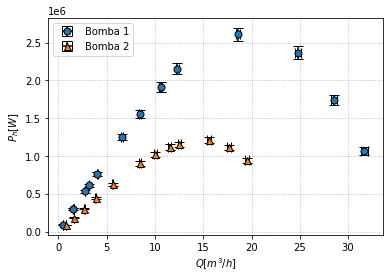

In [5]:
# Figura 2
fig, ax = plt.subplots()
ax.set(ylabel=r'$P_h[W]$', xlabel=r'$Q[m^3/h]$')

error(d_Q, b1.ph(d_Q), 'o', 'Bomba 1', ax)
error(s_Q, b2.ph(s_Q), '^', 'Bomba 2', ax)
       
ax.legend()
ax.grid(ls='dotted')
fig.savefig('P_x_Q.pdf', bbox_inches='tight')

In [6]:
tab = pd.DataFrame({'Q':s_Q, 'Ph':b2.ph(s_Q)})
print(tab.to_latex())

\begin{tabular}{lll}
\toprule
{} &              Q &                   Ph \\
\midrule
0  &   19.54+/-0.23 &    (9.45+/-0.30)e+05 \\
1  &   17.71+/-0.20 &  (1.117+/-0.035)e+06 \\
2  &   15.60+/-0.18 &    (1.21+/-0.04)e+06 \\
3  &   12.51+/-0.14 &    (1.15+/-0.04)e+06 \\
4  &   11.52+/-0.13 &  (1.120+/-0.035)e+06 \\
5  &   10.05+/-0.12 &  (1.026+/-0.032)e+06 \\
6  &    8.43+/-0.10 &    (9.02+/-0.28)e+05 \\
7  &    5.62+/-0.06 &    (6.29+/-0.20)e+05 \\
8  &    3.86+/-0.04 &    (4.41+/-0.14)e+05 \\
9  &  2.670+/-0.031 &    (3.05+/-0.10)e+05 \\
10 &  1.610+/-0.019 &    (1.84+/-0.06)e+05 \\
11 &  0.770+/-0.009 &    (8.80+/-0.28)e+04 \\
\bottomrule
\end{tabular}



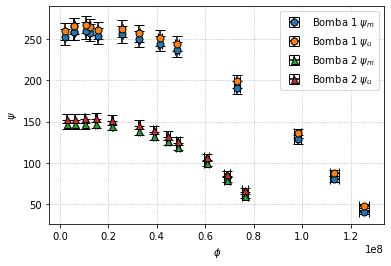

In [7]:
# Figura 3
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$\phi$')

#Bomba 1
error(b1.phi(d_Q, d_w, De), b1.psi_m(d_w, De), 'o', r'Bomba 1 $\psi_{m}$', ax)
error(b1.phi(d_Q, d_w, De), b1.psi_u(d_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)

#Bomba 2
error(b2.phi(s_Q, s_w, De), b2.psi_m(s_w, De), '^', r'Bomba 2 $\psi_{m}$', ax)
error(b2.phi(s_Q, s_w, De), b2.psi_u(s_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_phi.pdf', bbox_inches='tight')

In [8]:
tab = pd.DataFrame({'psi_m':b2.psi_m(s_w, De), 'psi_u':b2.psi_u(s_w, De), 'phi':b2.psi_m(s_w, De)})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &       psi\_m &       psi\_u &         phi \\
\midrule
0  &  59.9+/-2.4 &  67.2+/-2.5 &  59.9+/-2.4 \\
1  &  79.9+/-3.2 &  87.1+/-3.3 &  79.9+/-3.2 \\
2  &     100+/-4 &     107+/-4 &     100+/-4 \\
3  &     120+/-5 &     127+/-5 &     120+/-5 \\
4  &     126+/-5 &     133+/-5 &     126+/-5 \\
5  &     133+/-5 &     140+/-5 &     133+/-5 \\
6  &     139+/-5 &     146+/-5 &     139+/-5 \\
7  &     145+/-6 &     152+/-6 &     145+/-6 \\
8  &     148+/-6 &     155+/-6 &     148+/-6 \\
9  &     147+/-6 &     154+/-6 &     147+/-6 \\
10 &     146+/-6 &     153+/-6 &     146+/-6 \\
11 &     147+/-6 &     154+/-6 &     147+/-6 \\
\bottomrule
\end{tabular}



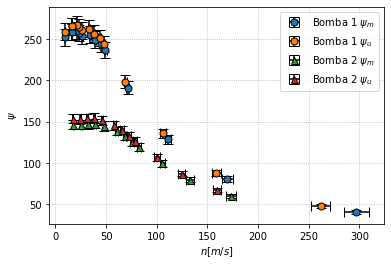

In [9]:
# Figura 4
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$n [m/s]$')

#Bomba 1
error(b1.nq_m(d_Q, d_w), b1.psi_m(d_w, De), 'o', r'Bomba 1 $\psi_{m}$', ax)
error(b1.nq_u(d_Q, d_w), b1.psi_u(d_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)

#Bomba 2
error(b2.nq_m(s_Q, s_w), b2.psi_m(s_w, De), '^', r'Bomba 2 $\psi_{m}$', ax)
error(b2.nq_u(s_Q, s_w), b2.psi_u(s_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_n.pdf', bbox_inches='tight')

In [10]:
tab = pd.DataFrame({'psi_m':b2.psi_m(s_w, De), 'psi_u':b2.psi_u(s_w, De), 'nqm':b2.nq_u(s_Q, s_w), 'nqu':b2.nq_u(s_Q, s_w)})
print(tab.to_latex())

\begin{tabular}{lllll}
\toprule
{} &       psi\_m &       psi\_u &          nqm &          nqu \\
\midrule
0  &  59.9+/-2.4 &  67.2+/-2.5 &      159+/-4 &      159+/-4 \\
1  &  79.9+/-3.2 &  87.1+/-3.3 &  124.5+/-3.2 &  124.5+/-3.2 \\
2  &     100+/-4 &     107+/-4 &  100.2+/-2.6 &  100.2+/-2.6 \\
3  &     120+/-5 &     127+/-5 &   78.8+/-2.0 &   78.8+/-2.0 \\
4  &     126+/-5 &     133+/-5 &   72.9+/-1.9 &   72.9+/-1.9 \\
5  &     133+/-5 &     140+/-5 &   65.6+/-1.7 &   65.6+/-1.7 \\
6  &     139+/-5 &     146+/-5 &   58.2+/-1.5 &   58.2+/-1.5 \\
7  &     145+/-6 &     152+/-6 &   46.0+/-1.2 &   46.0+/-1.2 \\
8  &     148+/-6 &     155+/-6 &   37.6+/-1.0 &   37.6+/-1.0 \\
9  &     147+/-6 &     154+/-6 &   31.3+/-0.8 &   31.3+/-0.8 \\
10 &     146+/-6 &     153+/-6 &   24.4+/-0.6 &   24.4+/-0.6 \\
11 &     147+/-6 &     154+/-6 &   16.8+/-0.4 &   16.8+/-0.4 \\
\bottomrule
\end{tabular}



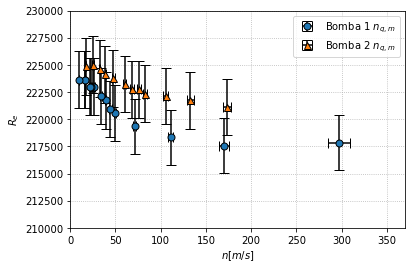

In [11]:
# Figura 5
viscosidade = 0.893e-6
fig, ax = plt.subplots()
ax.set(ylabel=r'$R_e$', xlabel=r'$n[m/s]$', ylim=(2.1e5,2.3e5), xlim=(0, 370))


#descarga
error(b1.nq_m(d_Q, d_w), b1.Re(d_w, De, viscosidade), 'o', r'Bomba 1 $n_{q,m}$', ax)
#error(b1.Re(d_w, De, viscosidade), b1.nq_u(d_Q, d_w), 'o', r'Descarga $n_{q,u}$', ax)

#sucção
error(b2.nq_m(s_Q, s_w), b2.Re(s_w, De, viscosidade), '^', r'Bomba 2 $n_{q,m}$', ax)
#error(b2.Re(s_w, De, viscosidade), b2.nq_u(s_Q, s_w), '^', r'Sucção $n_{q,u}$', ax)

ax.legend()
ax.grid(ls='dotted')

fig.savefig('Re_x_n.pdf', bbox_inches='tight')

In [12]:
tab = pd.DataFrame({'Re':b2.Re(s_w, De, viscosidade), 'nqm':b2.nq_u(s_Q, s_w), 'nqu':b2.nq_u(s_Q, s_w)})
print(tab.to_latex())

\begin{tabular}{llll}
\toprule
{} &                   Re &          nqm &          nqu \\
\midrule
0  &  (2.211+/-0.026)e+05 &      159+/-4 &      159+/-4 \\
1  &  (2.217+/-0.026)e+05 &  124.5+/-3.2 &  124.5+/-3.2 \\
2  &  (2.221+/-0.026)e+05 &  100.2+/-2.6 &  100.2+/-2.6 \\
3  &  (2.224+/-0.026)e+05 &   78.8+/-2.0 &   78.8+/-2.0 \\
4  &  (2.227+/-0.026)e+05 &   72.9+/-1.9 &   72.9+/-1.9 \\
5  &  (2.227+/-0.026)e+05 &   65.6+/-1.7 &   65.6+/-1.7 \\
6  &  (2.232+/-0.026)e+05 &   58.2+/-1.5 &   58.2+/-1.5 \\
7  &  (2.238+/-0.026)e+05 &   46.0+/-1.2 &   46.0+/-1.2 \\
8  &  (2.241+/-0.026)e+05 &   37.6+/-1.0 &   37.6+/-1.0 \\
9  &  (2.246+/-0.026)e+05 &   31.3+/-0.8 &   31.3+/-0.8 \\
10 &  (2.250+/-0.026)e+05 &   24.4+/-0.6 &   24.4+/-0.6 \\
11 &  (2.249+/-0.026)e+05 &   16.8+/-0.4 &   16.8+/-0.4 \\
\bottomrule
\end{tabular}

